# Data Exploration

## Observations

* there are **30** features
* values -999 == Nan values
* some of them have long tails

## Preprocessings : What we did
* Replace missing values by means of corresponding feature
* Log transform of heavy-tailed features
* Removed uniformly distributed features (*-phi)
* Standardization
* Added Bias term

note: the order is relevant

## Import

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, input_data, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
y.shape

(250000,)

In [4]:
input_data.shape

(250000, 30)

## Plot the distributions

In [5]:
def distributions_plot(tx):
    fig,axes = plt.subplots(5,6,figsize = (30,30))
    axes = axes.ravel()
    
    nb_features = tx.shape[1]
    for index,ax in enumerate(axes):
        if index < nb_features:
            column = tx[:,index]
            #don't take the undefined values
            ax.hist(column[np.where(column != -999)], bins=100)
            ax.set_title("feature " + str(index))
        
    #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
    plt.tight_layout()

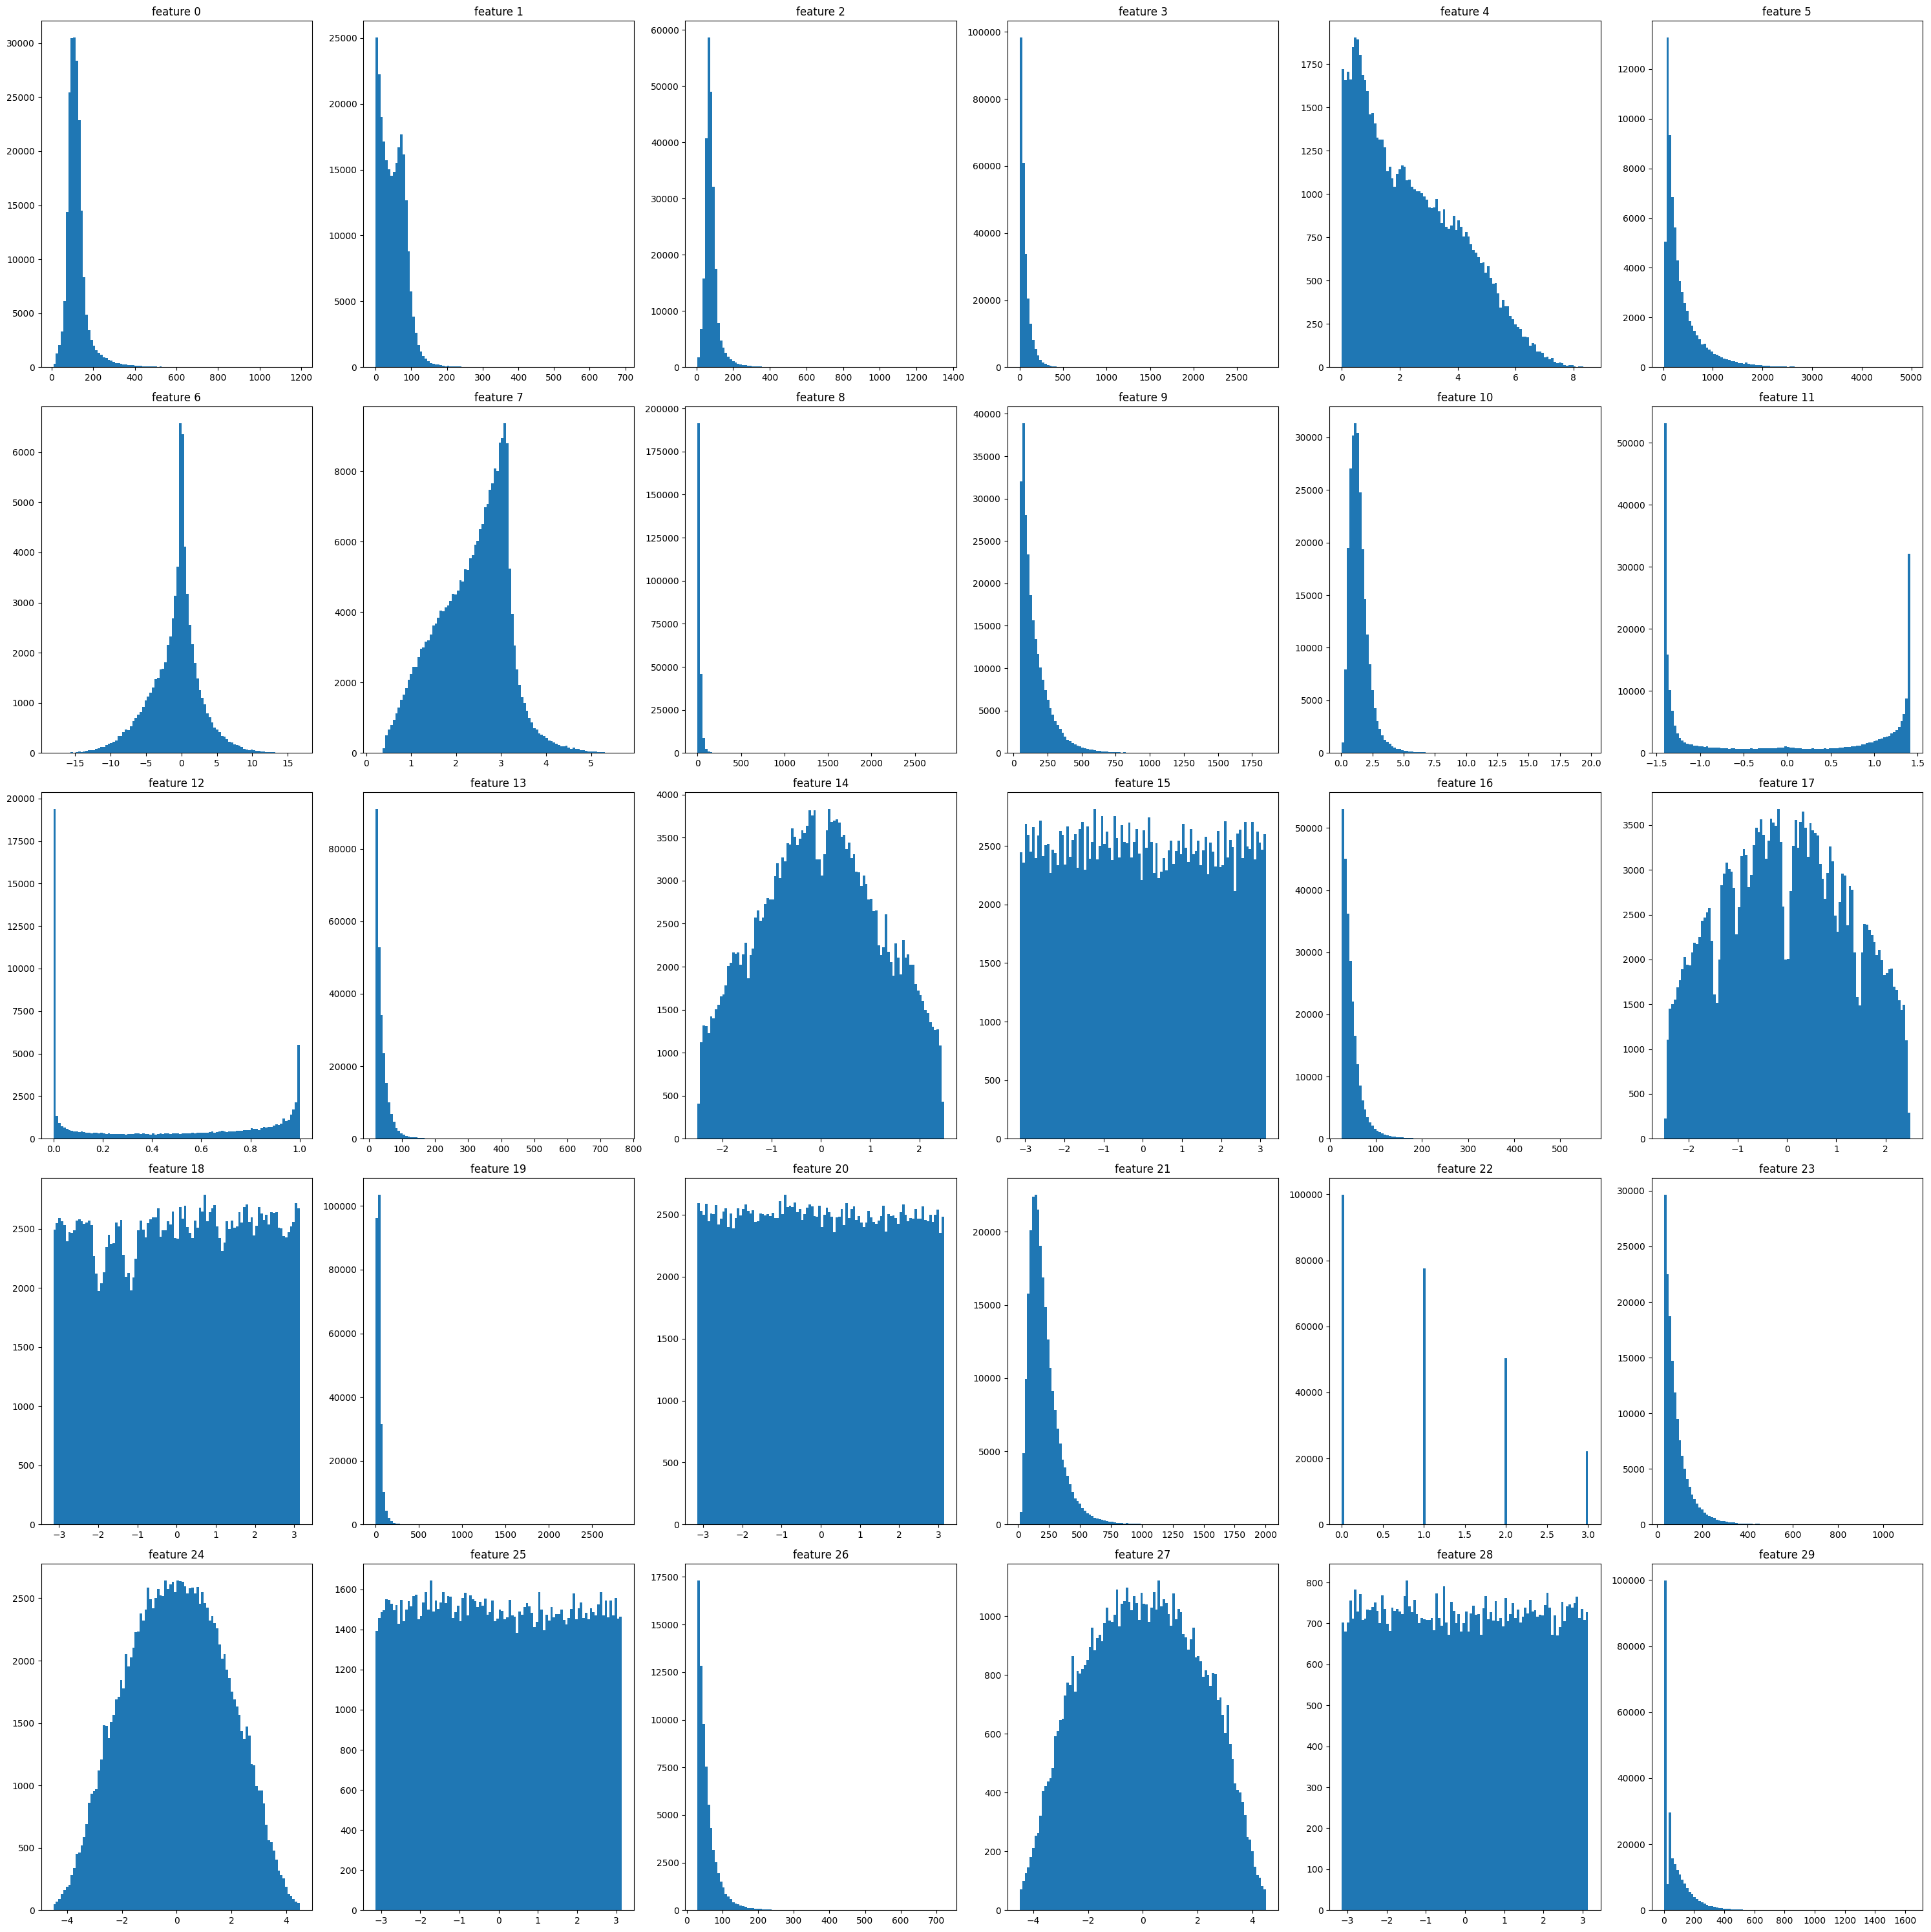

In [6]:
distributions_plot(input_data)

We notice that we have a unique categorical variable which is feature 23. Also, we have 5 uniform variables that correspond to features 15, 18, 20, 25 and 28.

We check the name of these columns and find that these are all features that contain phi. As the distributions are uniform, we can discard these columns because they are not useful for the predictions. 

We also see that features 0,1,2,3,5,8,9,10,13,16,19,21,23,26,29 are heavily tailed so we can apply a log transformation.

## Dealing with Undefined values i.e. -999

A natural decision would be to replace the -999 in a given feature vector (column of ) by the average of the elements in it.

In [7]:
def replace_undefined_values_with_mean(tX):
    """Replace the -999 values of each feature column by the mean of its elements"""
    
    cols = tX.shape[1]
    
    for col in range(cols):
        vect = tX[:, col]
        #delete -999 values before calculating the mean
        vect = np.delete(vect, np.where(vect == -999))
        #replace -999 values by mean
        tX[:,col][tX[:,col] == -999] = np.mean(vect)
    
    return tX

In [8]:
# number of -999 values
input_data[input_data == -999].size

1580052

In [9]:
tx = replace_undefined_values_with_mean(input_data)
tx[tx == -999].size

0

## Log transform of features with long tails

In the plots above, we notice that some features have long tails. We can do a log transform of these features.

In [10]:
def remove_skewness(tx):
    """Remove skewness by doing a log transform of the heavy tailes features"""
    heavy_tailed_features = [0,1,2,3,5,8,9,10,13,16,19,21,23,26,29]
    
    for skewed_feature in heavy_tailed_features:
        tx[:, skewed_feature] = np.log(1 + tx[:, skewed_feature])
        
    return tx

In [11]:
tx = remove_skewness(tx)

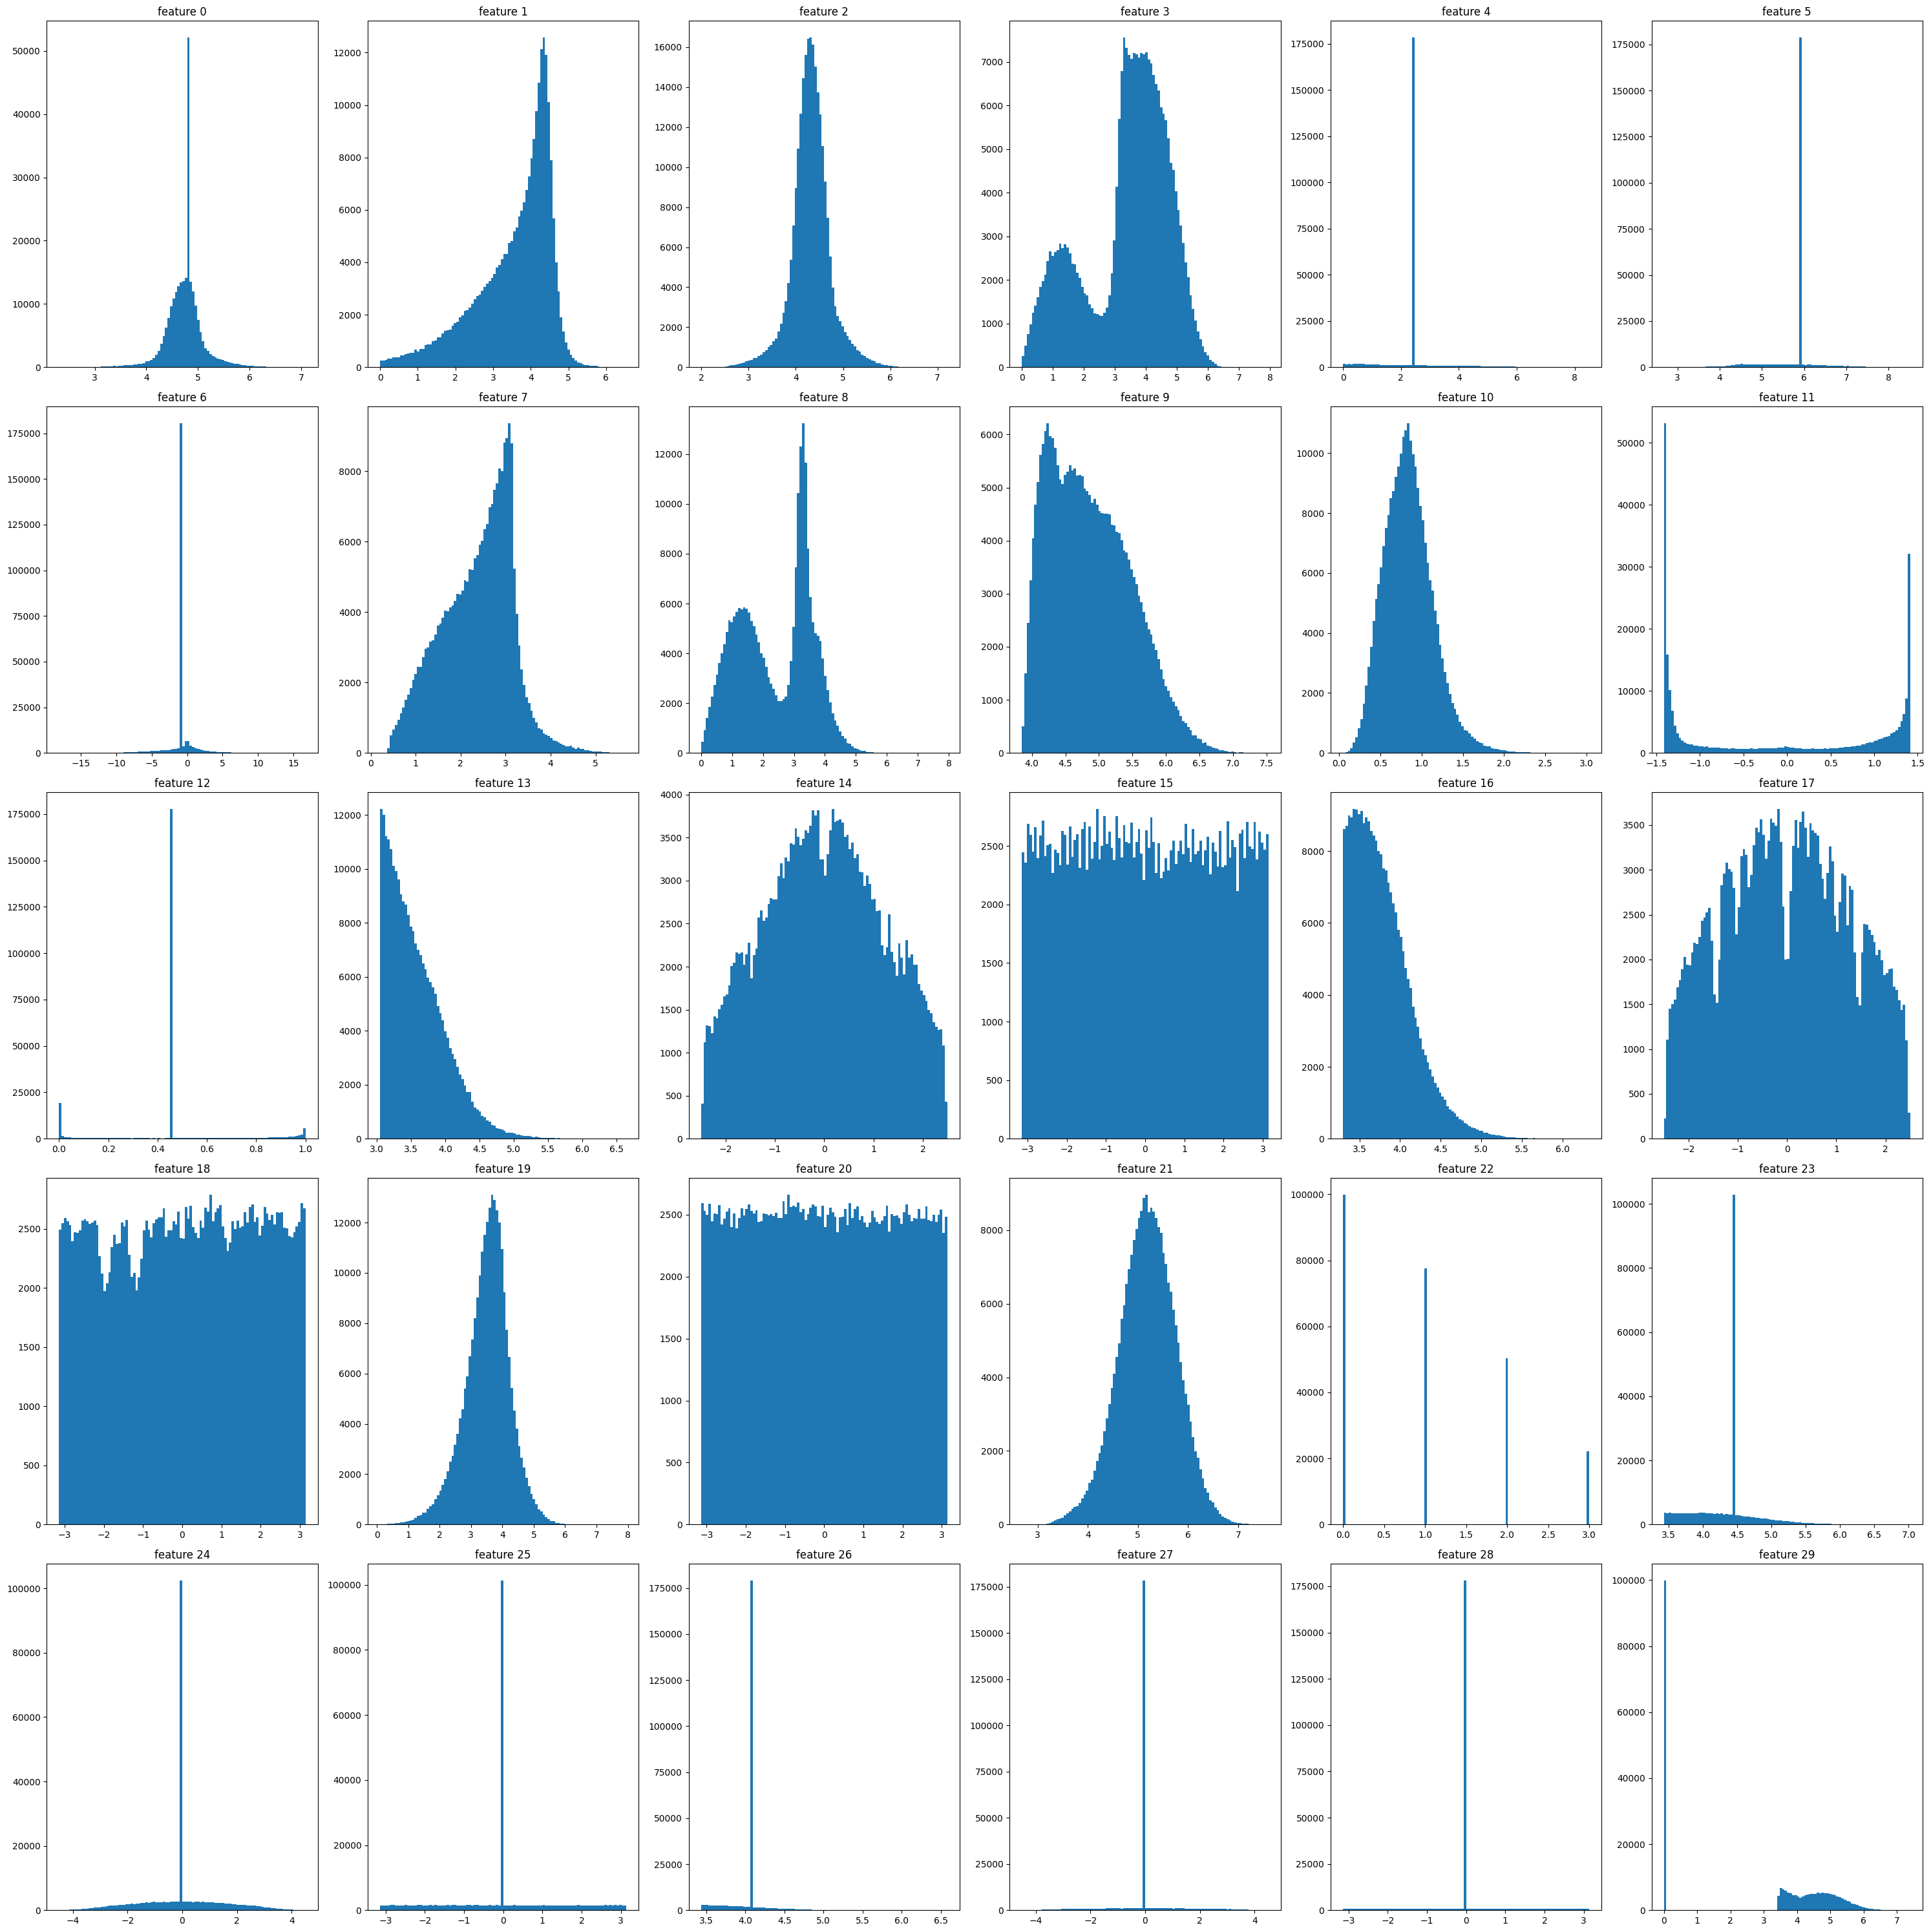

In [12]:
distributions_plot(tx)

Note that the presence of the vertical bars are explained by the fact that some of the features used to contain a lot of missing values, whose were all assigned the mean value of the feature. This is reflected in the histogram.

## dropping the *-phi features

In [13]:
def drop_phi_features(tx):
    """Remove features that contain phi"""
    phi_columns = [15, 18, 20, 25, 28]
    cols = np.arange(tx.shape[1])
    not_phi_cols = [col for col in cols if col not in phi_columns]

    return tx[:, not_phi_cols]

In [14]:
tx.shape

(250000, 30)

In [15]:
tx = drop_phi_features(tx)

In [16]:
tx.shape

(250000, 25)

## Standardize

It is a beneficial preprocessing step to standardize the data, i.e. subtract the mean and divide by the standard deviation for each dimension

In [17]:
def standardize(tx):
    """Standardize the data set."""

    cols = tx.shape[1]
    for col in range(cols):
        mean = np.mean(tx[:,col])
        std = np.std(tx[:,col])
        if std == 0:
            tx[:,col] = (tx[:,col] - mean)
        else:
            tx[:,col] = (tx[:,col] - mean) / std
    
    return tx

In [18]:
tx = standardize(tx)

print(np.mean(tx, axis=0), "\n\n", np.std(tx, axis=0))

[ 4.31555236e-16  6.71178668e-16 -8.38369374e-16 -5.54621238e-16
 -3.57289309e-16 -6.34102548e-16 -2.74553713e-17 -5.14546628e-16
 -1.08947518e-16  1.26999566e-15 -7.12532255e-17 -3.55555585e-17
 -2.05005790e-16  4.10977918e-17  1.33013600e-17 -2.48223841e-15
  1.35571554e-17 -8.80049811e-16 -1.59428737e-15  1.11981535e-17
 -2.26748398e-16 -3.41060513e-19 -6.25323082e-15 -1.84741111e-19
 -4.65547600e-17] 

 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


## Bias term

We need to add a column of 1s to the data in order to account for the bias term

In [19]:
def add_bias_term(input_data):
    """Add column of 1s which corresponds to the bias term"""
    num_samples = input_data.shape[0]
    tX = np.c_[np.ones(num_samples), input_data]
    
    return tX

In [20]:
tx = add_bias_term(tx)
tx[:,0]

array([1., 1., 1., ..., 1., 1., 1.])

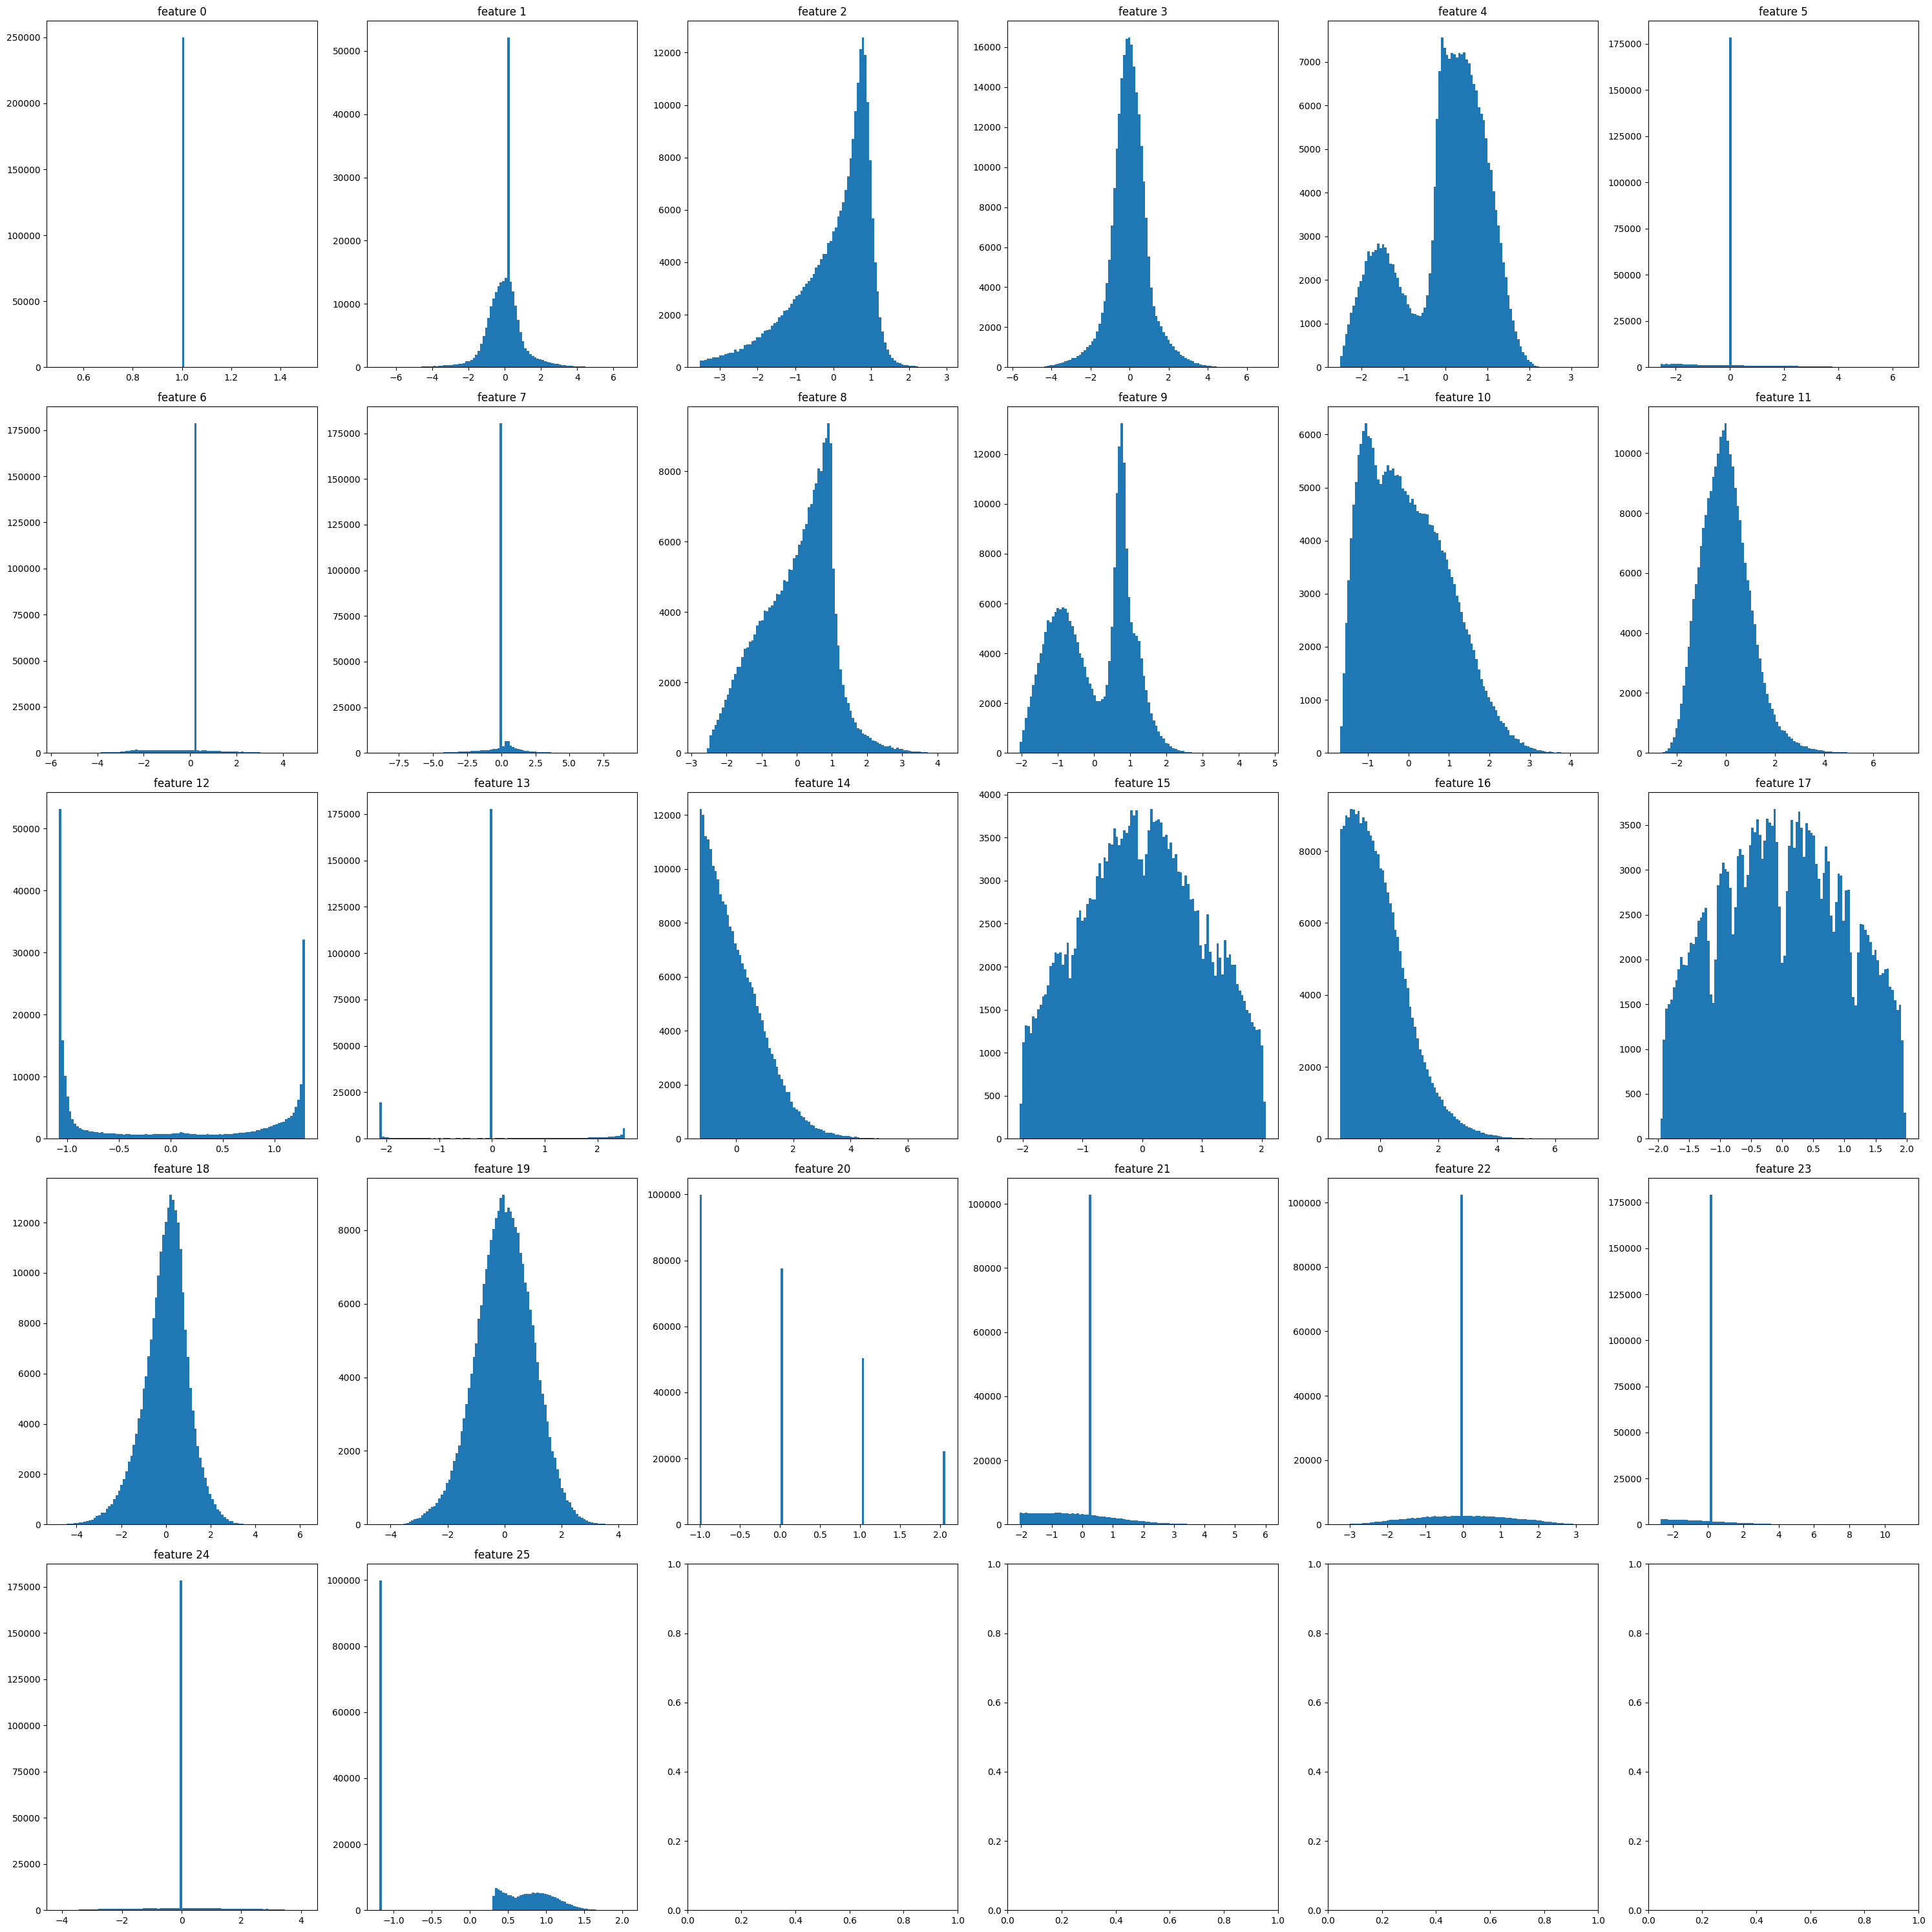

In [21]:
# Visualization of the final features
distributions_plot(tx)